In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, r2_score
from heapq import heappush, heappop
import sys



# Split Data

In [2]:
def SplitTestTrain(X, Y,percent = 0.8):
    mask = np.random.rand(len(X))<percent
    X_train = X[mask].dropna()
    X_test  = X[~mask].dropna()
    Y_train = Y[mask].dropna()
    Y_test  = Y[~mask].dropna()
    #print(X_train.shape, X_test.shape)
    X_train = X_train.reset_index(drop = True)
    X_test  = X_test.reset_index(drop = True)
    Y_train = Y_train.reset_index(drop = True)
    Y_test  = Y_test.reset_index(drop = True)
    print("before return")
    return X_train, X_test, Y_train ,Y_test

# Preprocessing

In [3]:
def standardize(X):
    X_standardized = (X - X.mean()) /X.std()
   # print(X_standardized)
    return X_standardized


In [4]:
def Normalise(df):
    normalized_df=(df-df.min())/(df.max()-df.min())
    return normalized_df

In [5]:
def preprocessing(X,type = "Normalise"):
    if(type == "Normalise"):
        return Normalise(X)
    else:
        return standardize(X)

# GradientDecent

In [6]:
def GradientDescent(train_X, train_Y,theta,alpha, iteration):
    m = train_X.shape
    #print(m)
    for i in range(iteration):
        b =  np.sum(train_X * (train_X @ theta.T - train_Y))
        theta = theta - (alpha / len(train_X)) * np.sum(train_X * (train_X @ theta.T - train_Y), axis=0)
        #print('b: ',b )
    return theta

           

# Train

In [7]:
def train(train_X,train_Y, preprocess,theta,alpha,it):
    train_X = preprocessing(train_X,preprocess)
    train_X = train_X.values
    ones    = np.ones([train_X.shape[0],1])
    train_X = np.concatenate((ones,train_X),axis=1)
    train_Y = train_Y.values
    #theta   = np.zeros([1,train_X.shape[1]])
    theta = GradientDescent(train_X, train_Y,theta,alpha,it)
    
    return theta
    


# Predict

In [8]:
def predict(test_X,theta,preprocess):
    test_X = preprocessing(test_X,preprocess)
    #print(test_X.shape)
    test_X = test_X.values
    #print(test_X)
    ones   = np.ones([test_X.shape[0],1])
    test_X = np.concatenate((ones, test_X), axis =1)
    return (test_X @ theta.T).flatten()


In [1]:
WeatherData = pd.read_csv("weather.csv")
WeatherData_X = WeatherData.drop(['Formatted Date','Precip Type','Summary','Apparent Temperature (C)','Daily Summary'],axis = 1)
print(list(WeatherData_X.columns))
WeatherData_Y = WeatherData[['Apparent Temperature (C)']]
print(WeatherData_Y.shape)
WeatherData_Y.columns = ['Apparent Temperature (C)']
WeatherDataTrain_X, WeatherDataTest_X, WeatherDataTrain_Y, WeatherDataTest_Y = SplitTestTrain(
WeatherData_X, WeatherData_Y)
theta = train(WeatherDataTrain_X,WeatherDataTrain_Y)
PredictedTemprature = predict(WeatherDataTest_X,theta,"std")
print(PredictedTemprature)
print("r 2 score :")
print(r2_score(WeatherDataTest_Y,PredictedTemprature))


r 2 score : .98


In [29]:
class Weather:
    theta = ""
    def standardize(self,X):
        X_standardized = (X - X.mean()) /X.std()
        #print(X_standardized)
        return X_standardized
    def Normalise(self,df):
        normalized_df=(df-df.min())/(df.max()-df.min())
        return normalized_df
    def preprocessing(self,X,type = "std"):
        if(type == "std"):
            return self.standardize(X)
        else:
            return   self.Normalise(X)
        
    def GradientDescent(self,train_X, train_Y):
        iteration = 1000
        alpha = 0.005
        m = train_X.shape
        #print(m)
        for i in range(iteration):
            c = m
            b =  np.sum(train_X * (train_X @ self.theta.T - train_Y))
            self.theta = self.theta - (alpha / len(train_X)) * np.sum(train_X * (train_X @ self.theta.T - train_Y), axis=0)

    def train(self,filename):
        train_XX = pd.read_csv(filename)
        train_X = train_XX.drop(['Formatted Date','Precip Type','Summary','Apparent Temperature (C)','Daily Summary'],axis = 1)
        train_Y = train_XX[['Apparent Temperature (C)']]
        train_Y.columns = ['Apparent Temperature (C)']
        #print(' train y ',train_Y[0:18])
        train_X = self.preprocessing(train_X,"std")
        #print(train_X.shape)
        train_X = train_X.values
        ones    = np.ones([train_X.shape[0],1])
        train_X = np.concatenate((ones,train_X),axis=1)
        print(train_X.shape)
        train_Y = train_Y.values
        self.theta   = np.ones([1,train_X.shape[1]])
        self.GradientDescent(train_X, train_Y)
        #print(self.theta)
    def predict(self,filename):
        test_XX = pd.read_csv(filename)
        test_X = test_XX.drop(['Formatted Date','Precip Type','Summary','Apparent Temperature (C)','Daily Summary'],axis = 1)
#         print(test_X.shape)
#         test_X = WeatherDataTest_X
        test_X = self.preprocessing(test_X,"std")
        
        test_X = test_X.values
        ones   = np.ones([test_X.shape[0],1])
        test_X = np.concatenate((ones, test_X), axis =1)
        print(test_X.shape)
        return (test_X @ self.theta.T).flatten()

In [33]:
model4 = Weather()
from sklearn.metrics import mean_squared_error
model4.train('./Datasets/q4/train.csv') # Path to the train.csv will be provided 
prediction4 = model4.predict('./Datasets/q4/test.csv') 
Y =  pd.read_csv('./Datasets/q4/test.csv')
Y = Y['Apparent Temperature (C)']
print("r 2 score :")
print(r2_score(Y,prediction4))
print(' mse ',mean_squared_error(Y,prediction4))

(77285, 7)
(19168, 7)
r 2 score :
0.98619708644309
 mse  1.5509137940706803


In [12]:
def error_percentage():
    Y = WeatherDataTest_Y.values
    res = np.empty(Y.shape)
    for i in range(Y.shape[0]):
        if Y[i]!=0:
            res[i] = (Y[i] - prediction4[i])/Y[i]
        else:
            res[i] = prediction4[i]/np.mean(Y)
        mm = np.mean(np.abs(res))*100
    return mm

# Performance Metrics:

In [87]:
print('R2 Score ',r2_score(WeatherDataTest_Y,prediction4))

R2 Score  0.9892024153137161


In [89]:
from sklearn.metrics import mean_squared_error
print('mse ', mean_squared_error(WeatherDataTest_Y,prediction4))

mse  1.2342133178694188


In [91]:
from sklearn.metrics import mean_absolute_error

print('Mae error ',mean_absolute_error(WeatherDataTest_Y,prediction4))

Mae error  0.8770547179370012


In [125]:

print('Mean percentage error ',error_percentage())

Mean percentage error  51.24810051800344


#  Graph MSE vs Number of Iteration for different Values of alpha and fixed value of theta

In [116]:
th = [0,100,200]
itr =[50,100,150,200,250,300,350,400,500,800,1000] 

In [117]:
from sklearn.metrics import mean_squared_error
def CalculateMSE():
    MSE = []
    WeatherData = pd.read_csv("weather.csv")
    WeatherData_X = WeatherData.drop(['Formatted Date','Precip Type','Summary','Apparent Temperature (C)','Daily Summary'],axis = 1)
    print(list(WeatherData_X.columns))
    WeatherData_Y = WeatherData[['Apparent Temperature (C)']]
    print(WeatherData_Y.shape)
    WeatherData_Y.columns = ['Apparent Temperature (C)']
    WeatherDataTrain_X, WeatherDataTest_X, WeatherDataTrain_Y, WeatherDataTest_Y = SplitTestTrain(
    WeatherData_X, WeatherData_Y)
    alpha = 0.009
    for Theta in th:
        theta = np.full((1,WeatherDataTrain_X.shape[1]+1),Theta)
        print(theta.shape)
        print(type(theta))
        a = []
        for it in  itr:
            theta = train(WeatherDataTrain_X,WeatherDataTrain_Y,"std",theta,alpha,it)
            pre = predict(WeatherDataTest_X,theta,"std")
            a.append(mean_squared_error(WeatherDataTest_Y,pre))
        MSE.append(a)
    return MSE
MSE = CalculateMSE()
#print(MSE)

         

['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
(77285, 1)
before return
(1, 7)
<class 'numpy.ndarray'>
(1, 7)
<class 'numpy.ndarray'>
(1, 7)
<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Different Values of theta')

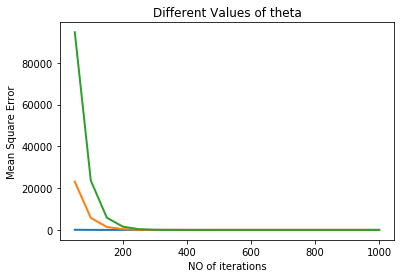

In [118]:
for mse in MSE:
    plt.plot(itr,mse,linewidth=2,markersize=12)
plt.xlabel('NO of iterations')
plt.ylabel('Mean Square Error')
plt.title("Different Values of theta")